In [1]:
#generic import and constant definition list
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import h5py
import astropy.constants as cons
from matplotlib.colors import LogNorm
import astropy.units as u
import pandas as pd
import scipy.optimize as opt
#all of the important fundamental constants are put into cgs units just for convenience
c=cons.c.cgs.value
G=cons.G.cgs.value
h=cons.h.cgs.value
hbar=cons.hbar.cgs.value
Msun=cons.M_sun.cgs.value
Rsun=cons.R_sun.cgs.value
Rearth=cons.R_earth.cgs.value
mp=cons.m_p.cgs.value
me=cons.m_e.cgs.value
mn=cons.m_n.cgs.value
kB=cons.k_B.cgs.value
mu_e=2 #mean mass per electron for He-core or C/O core composition
m_u = 1/cons.N_A.cgs.value #atomic mass unit in grams
import sys
sys.path.append('../utils') #adding the parent directory to the path so we can import from there
from solverUtils import * #importing the utils file

$$NEP^2 = 2 \int_{\nu_l}^{\nu_h} h^2 nu^2 (e^{h\nu/k_B T}-1)^{-1} d\nu + 2\int_{\nu_l}^{\nu_h} h^2 \nu^2 (e^{h\nu/k_B T}-1)^{-2} d\nu$$

$$ NET = \frac{NEP}{\sqrt{2} \int_{\nu_l}^{\nu_h} (h^2/k_B ) \nu^2 (e^{h\nu/k_B T}-1)^{-2} e^{h\nu/k_B T} d\nu}$$

In [89]:
T = 2.73
nu = np.linspace(1,600,2000) #frequency array from 0 to 600 GHz
nu = nu*1e9
bandwidths = 0.3*nu

#manually perform trapezoidal integration using the bandwidths
shotNoiseInt = (h**2)*bandwidths*(((0.85*nu)**2)*(np.exp(h*0.85*nu/(kB*T))-1)**(-1)+((1.15*nu)**2)*(np.exp(h*1.15*nu/(kB*T))-1)**(-1))
waveNoiseInt = 2*(h**2)*bandwidths*(((0.85*nu)**2)*(np.exp(h*0.85*nu/(kB*T))-1)**(-2)+((1.15*nu)**2)*(np.exp(h*1.15*nu/(kB*T))-1)**(-2))

nep = shotNoiseInt + waveNoiseInt
nep = np.sqrt(nep)

netInt = np.sqrt(2)*((h**2)/kB)*bandwidths*(((0.85*nu)**2)*np.exp(h*0.85*nu/(kB*T))*(np.exp(h*0.85*nu/(kB*T))-1)**(-2)+((1.15*nu)**2)*np.exp(h*1.15*nu/(kB*T))*(np.exp(h*1.15*nu/(kB*T))-1)**(-2))
net = nep/netInt

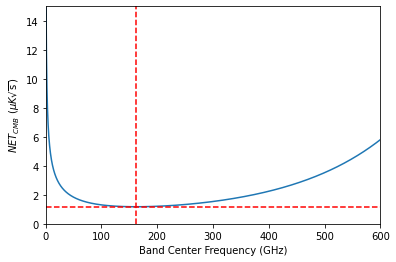

In [92]:
plt.plot(nu*1e-9, net*1e6)
plt.xlabel('Band Center Frequency (GHz)')
plt.ylabel('$NET_{CMB}$ ($\\mu K \\sqrt{\\mathrm{s}}$)')
plt.axvline(1e-9*nu[np.argmin(net)],color='red',linestyle='--')
plt.axhline(np.min(net)*1e6,color='red',linestyle='--')
plt.xlim((0,600))
plt.ylim(0,15)
plt.show()

In [91]:
print("Minimum NET_CMB:",np.min(net)*1e6,"microK sqrt(s) at frequency",nu[np.argmin(net)]*1e-9,"GHz")

Minimum NET_CMB: 1.1763166520751187 microK sqrt(s) at frequency 162.21160580290146 GHz


My scaling for the NET seems to be off by a factor of 10 somehow but I can't quite figure out where I went wrong. The general shape is correct though and the optimal frequency that I recover is relatively close to the true optimal frequency band which is centered at 147.3 GHz.